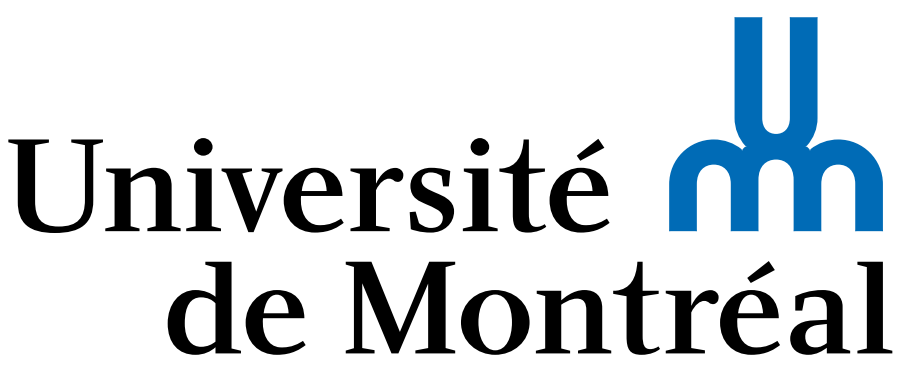

# IFT6285 (TALN) 

## Devoir 1: Compter des mots 

Réalisé par:\
**Mouna Dhaouadi \
Kacem Khaled**

Soumis à:\
*Prof. Philippe Langlais\
Frédéric Piedboeuf*


**Automne 2021**

In [1]:
import nltk
import sys
from collections import Counter
import pandas as pd
from os import listdir
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

In [2]:
folder = 'training-monolingual.tokenized.shuffled/'
folder_short = '1bshort/'

# Part 1 : Counting Words without transformation (Questions 1 to 4)

In [114]:
def count_words_wc(folder):
    files = listdir(folder)
    wc = Counter()
    times = []
    types = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read()
            tokens = corpus.split()
            wc += Counter(tokens)
            times.append(time.time() - start_time)
            types.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    print("Total time : --- %s seconds ---" % total_time)
    vocab_size = len(wc)
    print("Vocab size :", vocab_size)
    return total_time, wc, times, types

In [4]:
total_time, wc, times, types = count_words_wc(folder)

100%|██████████| 99/99 [02:44<00:00,  1.66s/it]

Total time : --- 164.3430995941162 seconds ---
Vocab size : 2425337


In [5]:
df = pd.DataFrame.from_dict(wc, orient='index', columns = ['frequency'])
print(df)


                     frequency
The                    5264636
U.S.                    639841
Centers                   8863
for                    6509312
Disease                   8823
...                        ...
Carefully-regulated          1
LabNearly                    1
benefitsor                   1
Ndoungou                     1
un-prepossessing             1

[2425337 rows x 1 columns]


In [6]:
total_words = df['frequency'].sum()
total_types = len(df)

In [7]:
# number of tokens
print("Number of tokens: ", total_words)
# vocab size: len(wc) = = len(df)
vocab_size = len(wc)
print("Vocab size: ", len(wc))

Number of tokens:  768648884
Vocab size:  2425337


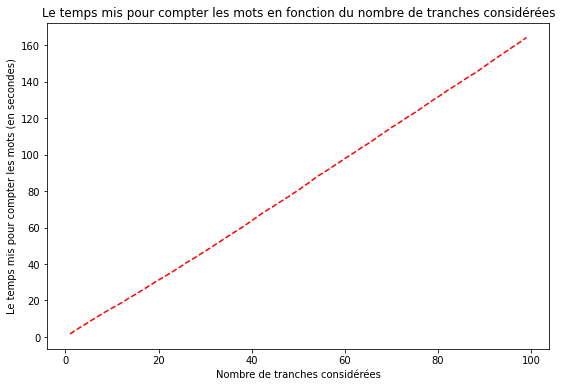

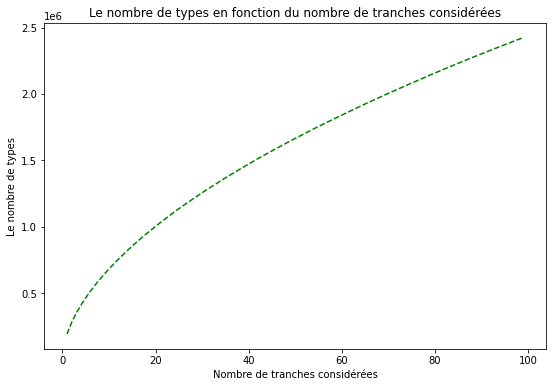

In [8]:
tranches = list(range(1,100))
plt.figure(figsize=(9,6))
plt.plot(tranches, times,'r--')
plt.title("Le temps mis pour compter les mots en fonction du nombre de tranches considérées")
plt.xlabel("Nombre de tranches considérées")
plt.ylabel("Le temps mis pour compter les mots (en secondes)")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(tranches, types , 'g--')
plt.title("Le nombre de types en fonction du nombre de tranches considérées")
plt.xlabel("Nombre de tranches considérées")
plt.ylabel("Le nombre de types")
plt.show()

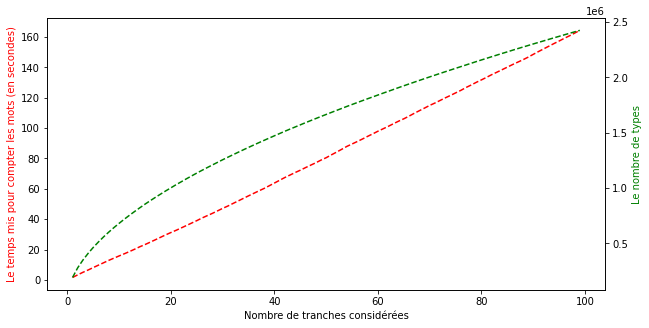

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(tranches, times,'r--')
ax.set_xlabel("Nombre de tranches considérées")
ax.set_ylabel("Le temps mis pour compter les mots (en secondes)", color = 'r')

ax2=ax.twinx()

ax2.plot(tranches, types , 'g--')
ax2.set_xlabel("Nombre de tranches considérées")
ax2.set_ylabel("Le nombre de types", color = 'g')
plt.show()

#### CPU Specifications:
**Processor**  
10th Generation Intel® Core™ i7-10750H Processor (2.60 GHz, up to 5.00 GHz with Turbo Boost, 6 Cores, 12 Threads, 12 MB Cache)

A screenshot while running the notebook shows that the CPU speed is varying @ around 4.40 GHz:

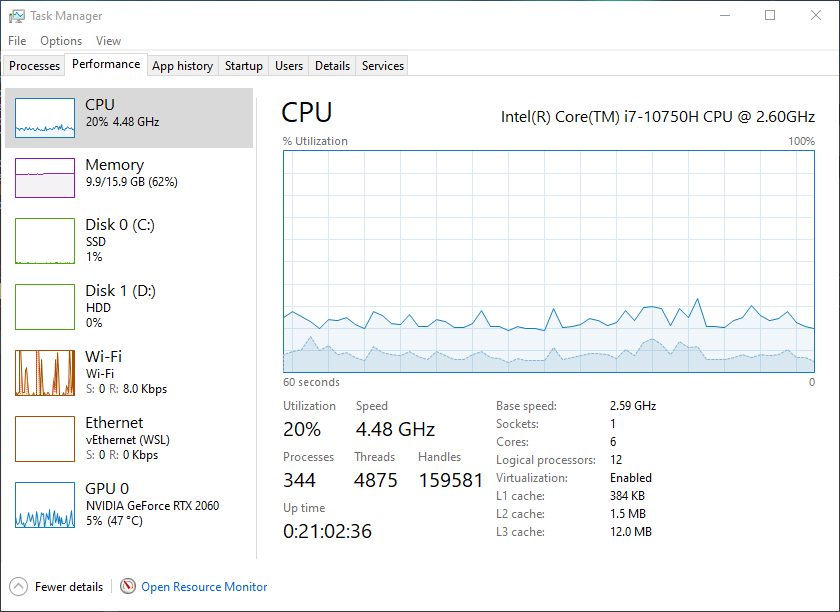

# Part 2 : Multiple transformations comparison (Question 5)


In [10]:
!pip install clean-text

In [11]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from nltk.stem import 	WordNetLemmatizer

from cleantext import clean

nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords_english = stopwords.words('english')

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kacem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
def count_words(folder, lower = False, numeric = False, url = False, 
                stem = False, lem = False, puncts = False, stopwords = False):
    files = listdir(folder)
    wc = Counter()
    times = []
    types = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read()
            if numeric or url:
                corpus = clean(corpus,fix_unicode=False,to_ascii = False,
                            lower=False, no_numbers=numeric,
                            replace_with_number="__NUM__", no_urls=url,
                            replace_with_url="__URL__")
            tokens = corpus.split()
            if puncts:
                tokens = [ t for t in tokens if t not in string.punctuation]
            if lower:
                tokens = [t.lower() for t in tokens]
            if stem:
                tokens = [stemmer.stem(t) for t in tokens]
            if lem: 
                tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
            if stopwords:
                tokens = [ t for t in tokens if t not in stopwords_english]               
            
            wc += Counter(tokens)
            times.append(time.time() - start_time)
            types.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    vocab_size = len(wc)
    print("Vocab size :", vocab_size)
    print("Total time : --- %s seconds ---" % total_time)
    return total_time, vocab_size, times, types


### Transformations :

In [13]:
# simple: no transformation
total_time, vocab_size, times, types = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = False)

100%|██████████| 99/99 [02:53<00:00,  1.75s/it]


Vocab size : 2425337
Total time : --- 173.46188163757324 seconds ---


In [14]:
# transformation 1 : lower
total_time_1, vocab_size_1, times_1, types_1 = count_words(folder, lower = True, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [04:15<00:00,  2.58s/it]


Vocab size : 2183893
Total time : --- 255.00604128837585 seconds ---


In [15]:
# transformation 2 : no puncts
total_time_2, vocab_size_2, times_2, types_2 = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = True, stopwords = False)


100%|██████████| 99/99 [04:11<00:00,  2.54s/it]


Vocab size : 2425305
Total time : --- 251.06745886802673 seconds ---


In [16]:
# transformation 3 : no stopwords
total_time_3, vocab_size_3, times_3, types_3 = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = True)


100%|██████████| 99/99 [20:59<00:00, 12.72s/it]


Vocab size : 2425184
Total time : --- 1259.3751766681671 seconds ---


In [17]:
# transformation 4 : stem
total_time_4, vocab_size_4, times_4, types_4 = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = True, lem = False, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [2:28:03<00:00, 89.74s/it]  

Vocab size : 1978573
Total time : --- 8883.943012714386 seconds ---


In [18]:
# transformation 5 : lem
total_time_5, vocab_size_5, times_5, types_5  = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = True, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [40:28<00:00, 24.53s/it]


Vocab size : 2402521
Total time : --- 2428.058193206787 seconds ---


In [19]:
# transformation 6 : no numeric
total_time_6, vocab_size_6, times_6, types_6 = count_words(folder, lower = False, numeric = True, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [18:11<00:00, 11.02s/it]

Vocab size : 2097094
Total time : --- 1091.4372432231903 seconds ---


In [20]:
# transformation 7 : no url
total_time_7, vocab_size_7, times_7, types_7 = count_words(folder, lower = False, numeric = False, 
                                        url = True, stem = False, lem = False, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [14:48<00:00,  8.97s/it]


Vocab size : 2365863
Total time : --- 888.0872147083282 seconds ---


In [21]:
# save the curves data in csv files
all_times = [times, times_1, times_2, times_3, times_4, times_5, times_6, times_7]
all_types = [types, types_1, types_2, types_3, types_4, types_5, times_6, times_7]
import numpy as np
np.savetxt("outputs/times.csv", 
           all_times,
           delimiter =", ", 
           fmt ='% s')
np.savetxt("outputs/types.csv", 
           all_types,
           delimiter =", ", 
           fmt ='% s')


In [22]:
transformations = ['none','lower','no puncts','no stopwords','stemming','lemmatization','no numeric','no url']
vocab_sizes = [vocab_size, vocab_size_1, vocab_size_2, vocab_size_3, vocab_size_4, vocab_size_5, vocab_size_6, vocab_size_7]
total_times = [total_time, total_time_1, total_time_2, total_time_3, total_time_4, total_time_5, total_time_6, total_time_7]

In [23]:
def plot_curve(values, transformations, title = '',xlabel = '',ylabel='',n=100):
    tranches = list(range(1,n))
    plt.figure(figsize=(12,9))
    for i in range(len(transformations)):
        plt.plot(tranches, values[i], label=transformations[i])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="upper left")
    plt.show()

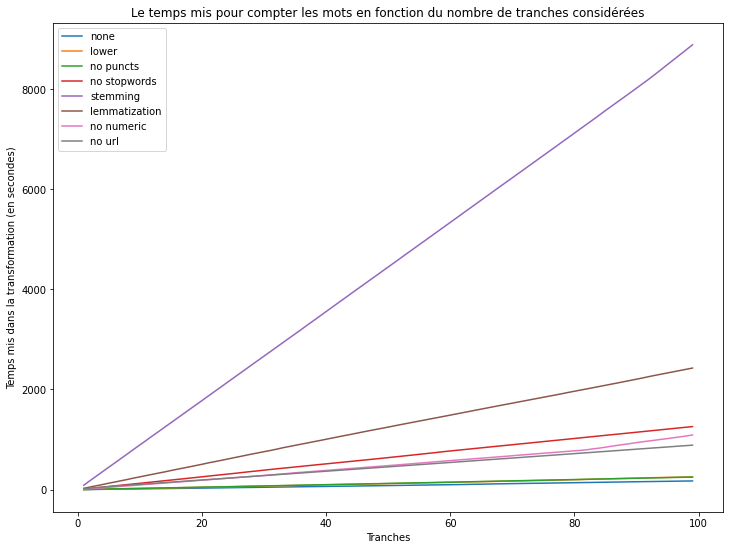

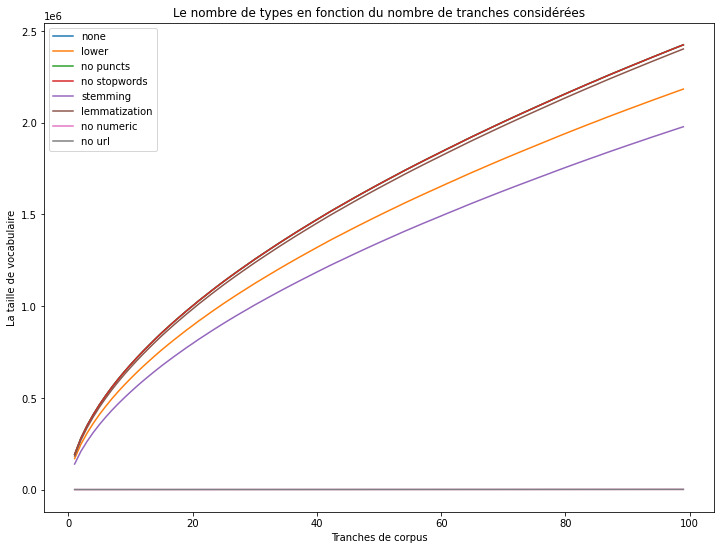

In [24]:
plot_curve(all_times,transformations,
           title="Le temps mis pour compter les mots en fonction du nombre de tranches considérées",
          xlabel = "Tranches",
          ylabel = "Temps mis dans la transformation (en secondes)")
plot_curve(all_types,transformations, 
           title="Le nombre de types en fonction du nombre de tranches considérées",
          xlabel = "Tranches de corpus",
          ylabel = "La taille de vocabulaire")

In [25]:
d = {'Transformations': transformations, 'Vocabulary size': vocab_sizes, 'Execution time (s)': total_times, 
     'Reduced Vocab ‰': [(v - vocab_sizes[0])*1000/vocab_sizes[0] for v in vocab_sizes],'Lost time': [t - total_times[0] for t in total_times] }
df_results = pd.DataFrame(data=d)

In [26]:
df_results

,Transformations,Vocabulary size,Execution time (s),Reduced Vocab ‰,Lost time
0,none,2425337,173.461882,0.000000,0.000000
1,lower,2183893,255.006041,-99.550702,81.544160
2,no puncts,2425305,251.067459,-0.013194,77.605577
3,no stopwords,2425184,1259.375177,-0.063084,1085.913295
4,stemming,1978573,8883.943013,-184.206978,8710.481131
5,lemmatization,2402521,2428.058193,-9.407352,2254.596312
6,no numeric,2097094,1091.437243,-135.339130,917.975362
7,no url,2365863,888.087215,-24.521953,714.625333


In [27]:
df_results.sort_values(by=['Vocabulary size'])

,Transformations,Vocabulary size,Execution time (s),Reduced Vocab ‰,Lost time
4,stemming,1978573,8883.943013,-184.206978,8710.481131
6,no numeric,2097094,1091.437243,-135.339130,917.975362
1,lower,2183893,255.006041,-99.550702,81.544160
7,no url,2365863,888.087215,-24.521953,714.625333
5,lemmatization,2402521,2428.058193,-9.407352,2254.596312
3,no stopwords,2425184,1259.375177,-0.063084,1085.913295
2,no puncts,2425305,251.067459,-0.013194,77.605577
0,none,2425337,173.461882,0.000000,0.000000


In [28]:
df_results.sort_values(by=['Execution time (s)'])

,Transformations,Vocabulary size,Execution time (s),Reduced Vocab ‰,Lost time
0,none,2425337,173.461882,0.000000,0.000000
2,no puncts,2425305,251.067459,-0.013194,77.605577
1,lower,2183893,255.006041,-99.550702,81.544160
7,no url,2365863,888.087215,-24.521953,714.625333
6,no numeric,2097094,1091.437243,-135.339130,917.975362
3,no stopwords,2425184,1259.375177,-0.063084,1085.913295
5,lemmatization,2402521,2428.058193,-9.407352,2254.596312
4,stemming,1978573,8883.943013,-184.206978,8710.481131


In [186]:
import matplotlib.pyplot as plt

def plot_vocab_time_per_transf(total_times,vocab_sizes, transformations):
    fig, ax = plt.subplots(figsize=(8,7))
    for i in range(len(transformations)):

        ax.scatter(total_times[i],vocab_sizes[i],  label=transformations[i],
                   alpha=1)

    ax.legend()
    ax.grid(True)
    plt.title("Nb Types/Temps d'exécution")
    plt.xlabel("Temps mis dans la transformation (en secondes)")
    plt.ylabel("La taille de vocabulaire")
    fig.savefig("outputs/types Vs time of "+str(len(transformations)-1)+" transformations.svg",format="svg")
    plt.show()


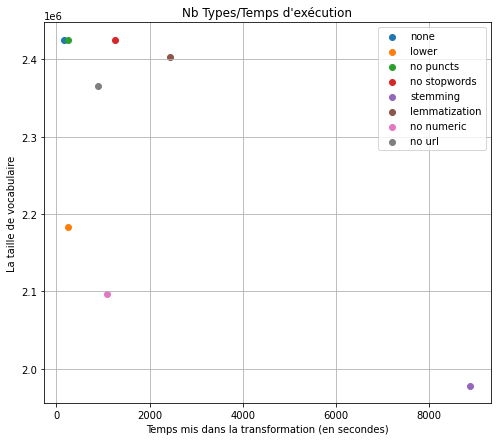

In [187]:
plot_vocab_time_per_transf(total_times,vocab_sizes, transformations)

## Chosen transformations: "Execution time" wise
{lower, no puncts, no url, no numeric}

In [31]:
def count_words_multiple_1(folder, lower = False, numeric = False, url = False, 
                stem = False, lem = False, puncts = False, stopwords = False):
    files = listdir(folder)
    wc = Counter()
    times = []
    types = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read()
            if numeric or url or lower or puncts:
                corpus = clean(corpus,fix_unicode=False,to_ascii = False,
                            lower=lower, no_numbers=numeric,no_punct = puncts,
                            replace_with_number="__NUM__", no_urls=url,
                            replace_with_url="__URL__")
            tokens = corpus.split()
            #if puncts and lower:
            #    tokens = [ t.lower() for t in tokens if t not in string.punctuation]
            if stem:
                tokens = [stemmer.stem(t) for t in tokens]
            if lem: 
                tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
            if stopwords:
                tokens = [ t for t in tokens if t not in stopwords_english] 
            wc += Counter(tokens)
            times.append(time.time() - start_time)
            types.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    vocab_size = len(wc)
    print("Vocab size :", vocab_size)
    print("Total time : --- %s seconds ---" % total_time)
    return total_time, vocab_size, times, types, wc

In [32]:
# transformation  : lower, no puncts, no url, no numeric
total_time_i, vocab_size_i, times_i, types_i, wc_i = count_words_multiple_1(folder, lower = True, numeric = True, 
                                        url = True, stem = False, lem = False, 
                                        puncts = True, stopwords = False)

100%|██████████| 99/99 [22:34<00:00, 13.68s/it]

Vocab size : 1664128
Total time : --- 1354.6343467235565 seconds ---


## Chosen transformations: "Vocabulary size" wise
{stemming, no numeric, lower, no url}

In [33]:
def count_words_multiple_2(folder, lower = False, numeric = False, url = False, 
                stem = False, lem = False, puncts = False, stopwords = False):
    files = listdir(folder)
    wc = Counter()
    times = []
    types = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read()
            if numeric or url or lower:
                corpus = clean(corpus,fix_unicode=False,to_ascii = False,
                            lower=lower, no_numbers=numeric,
                            replace_with_number="__NUM__", no_urls=url,
                            replace_with_url="__URL__")
            tokens = corpus.split()
            #if puncts and lower:
            #    tokens = [ t.lower() for t in tokens if t not in string.punctuation]
            if stem:
                tokens = [stemmer.stem(t) for t in tokens]
            if lem: 
                tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
            if stopwords:
                tokens = [ t for t in tokens if t not in stopwords_english] 
            wc += Counter(tokens)
            times.append(time.time() - start_time)
            types.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    vocab_size = len(wc)
    print("Vocab size :", vocab_size)
    print("Total time : --- %s seconds ---" % total_time)
    return total_time, vocab_size, times, types, wc

In [34]:
# transformation  : stemming, no numeric, lower, no url
total_time_ii, vocab_size_ii, times_ii, types_ii, wc_ii = count_words_multiple_2(folder, lower = True, numeric = True, 
                                        url = True, stem = True, lem = False, 
                                        puncts = False, stopwords = False)

100%|██████████| 99/99 [2:56:24<00:00, 106.92s/it]  


Vocab size : 1592196
Total time : --- 10584.886978387833 seconds ---


### Comparison : "Execution time" wise Vs "Vocabulary size" wise

In [175]:
new_transformations = transformations + ['time-wise:low/no_puncts/no_url/no_num','vocab-wise:stem/no_num/low/no_url']
new_vocab_sizes = vocab_sizes + [vocab_size_i,vocab_size_ii]
new_total_times = total_times + [total_time_i,total_time_ii]


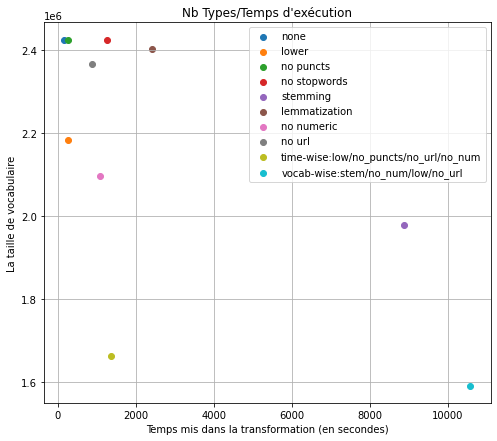

In [188]:
plot_vocab_time_per_transf(new_total_times,new_vocab_sizes, new_transformations)

### Final combination: Trade-off between speed and vocab size
{lower, no url, no numeric}

In [37]:
def count_words_multiple_final(folder, lower = False, numeric = False, url = False, 
                stem = False, lem = False, puncts = False, stopwords = False):
    files = listdir(folder)
    wc = Counter()
    times = []
    types = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read()
            if numeric or url:
                corpus = clean(corpus,fix_unicode=False,to_ascii = False,
                            no_numbers=numeric, #no_punct = puncts, lower=lower,
                            replace_with_number="__NUM__", no_urls=url,
                            replace_with_url="__URL__")
            tokens = corpus.split()
            if lower:
                tokens = [ t.lower() for t in tokens]
            
            wc += Counter(tokens)
            times.append(time.time() - start_time)
            types.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    vocab_size = len(wc)
    print("Vocab size :", vocab_size)
    print("Total time : --- %s seconds ---" % total_time)
    return total_time, vocab_size, times, types, wc

In [38]:
# transformation  : lower, no url, no numeric
total_time_final, vocab_size_final, times_final, types_final, wc_final = count_words_multiple_final(folder, lower = True, numeric = True, 
                                        url = True, stem = False, lem = False, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [21:06<00:00, 12.80s/it]

Vocab size : 1797611
Total time : --- 1266.9220066070557 seconds ---


In [39]:
final_transformations = new_transformations + ['final : low/no_url/no_num']
final_vocab_sizes = new_vocab_sizes + [vocab_size_final]
final_total_times = new_total_times + [total_time_final]


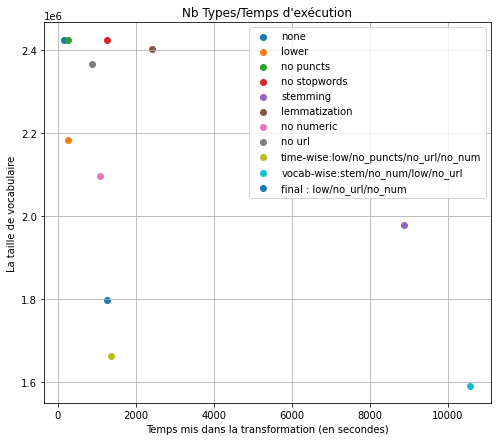

In [189]:
plot_vocab_time_per_transf(final_total_times,final_vocab_sizes, final_transformations)

## Part 3
### 1- Counting words in `1bshort`

In [115]:
total_time_short, wc_short, _, _ = count_words_wc(folder_short)

100%|██████████| 9/9 [00:17<00:00,  1.91s/it]

Total time : --- 17.206393003463745 seconds ---
Vocab size : 642641


In [116]:
df_short = pd.DataFrame.from_dict(wc_short, orient='index', columns = ['frequency'])
df_short.index.name = 'word'
df_short = df_short.reset_index()

In [118]:
df_short

,word,frequency
0,The,479626
1,U.S.,58474
2,Centers,805
3,for,591740
4,Disease,787
...,...,...
642636,involute,1
642637,lotsa,1
642638,L-Tyrosine,1
642639,6605,1


In [119]:
df_short_sorted = df_short.sort_values(by=['frequency'], ascending= False)
df_short_sorted.head(100).to_csv('outputs/df_short.txt',  sep=' ',  header = False, columns =['frequency','word'], index = False)

In [120]:
df_short_sorted

,word,frequency
22,the,3268925
17,",",3194618
43,.,2726336
12,to,1650316
25,of,1577381
...,...,...
361920,mini-fishing,1
361918,calorie-stuffed,1
361917,potholing,1
361916,Jubur,1


### 2- Counting most frequent and less frequent words in processed corpus

In [61]:
df_final = pd.DataFrame.from_dict(wc_final, orient='index', columns = ['frequency'])
df_final.index.name = 'word'
df_final = df_final.reset_index()

In [62]:
df_final

,word,frequency
0,the,41223601
1,u.s.,640048
2,centers,28868
3,for,6763830
4,disease,77275
...,...,...
1797606,carefully-regulated,1
1797607,labnearly,1
1797608,benefitsor,1
1797609,ndoungou,1


In [63]:
# freq top 1000
df_top_1000 = df_final.sort_values(by=['frequency'], ascending= False).head(1000)
df_top_1000.to_csv('outputs/freq-top1000.txt',  sep=' ', line_terminator = ' ', header = False, columns =['word'], index = False)
# visualize the result
df_top_1000

,word,frequency
0,the,41223601
17,",",35089484
41,.,29969612
12,to,18251267
24,of,17407846
...,...,...
3249,sector,80870
1461,caused,80770
2466,term,80742
125,everything,80664


In [64]:
#freq less 1000
df_less_100 = df_final.sort_values(by=['frequency'], ascending= True)
df_less_100.head(1000).to_csv('outputs/freq-less1000.txt',  sep=' ', line_terminator = ' ', header = False, columns =['word'], index = False)
# visualize the result
df_less_100 

,word,frequency
898805,explosives-to-bullets,1
1196986,hippie-slang,1
1196985,niqabi,1
1196984,issue-centred,1
1196983,pro-assimilation,1
...,...,...
24,of,17407846
12,to,18251267
41,.,29969612
17,",",35089484


**Par curiosité, on voulait savoir le nombre des mots qui ne se repètent pas dans le corpus, c'est à dire, les mots ayants une fréquence égale à 1. C'est environ 950k mots. Ça peut être consideré comme un nombre significatif en le comparant à la taille globale du vocabulaire 2400k: ~40% des mots de vocabulaire sont des mots uniques.**

In [65]:
df_final[(df_final['frequency']==1)].count()

word         954331
frequency    954331
dtype: int64

#### Observation :
L'énoncé dit que les "l'espace est séparateur de mots", si on précise explicitement dans le code qu'on fera le `split(' ')` avec les espaces seulement, ça ignore les autres séparateurs (comme le retour à la ligne (`\n`) et ça augmente notemment la taille de vocabulaire avec des mots mélangés avec des séparateurs.
Alors, nous avons fait une séparation plus générale qui inclut les autres séparateurs du texte: `split()`. 

Exemple: 
```python 
>>> S = "The girl is\tsitting on the chair , she\nis reading a paper !"
>>> S.split()
['The', 'girl', 'is', 'sitting', 'on', 'the', 'chair', ',', 'she', 'is', 'reading', 'a', 'paper', '!']
>>> S.split(" ")
['The', 'girl', 'is\tsitting', 'on', 'the', 'chair', ',', 'she\nis', 'reading', 'a', 'paper', '!']
>>> print(S)
``` 
```
The girl is     sitting on the chair , she
is reading a paper !
```

